# RNN for Time Series Prediction

This is a time series prediction task. You are given a dataset which reports on the weather and the level of pollution each hour for five years, and asked to train Recurrent Neural Networks (RNNs) to predict the hourly pollution level.

In [1]:
import numpy as np 
import pandas as pd 
import math
from datetime import datetime
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 
from collections import Counter
%matplotlib inline

a) Load the data from the file. Perform necessary pre-processing (e.g., missing value replacement, uninformative attribute removal, etc.) and visualise the values of various attributes over the five-year period.

In [2]:
import os
import sys

# write your code here
DATA_DIR = './data/'
FILENAME = "pollution.csv"
FILE_PATH = os.path.abspath(os.path.join(DATA_DIR, FILENAME))
# print(FILE_PATH)

pollution_df = pd.read_csv(FILE_PATH, index_col="No")


In [3]:

HEAD_COUNT = 10

pollution_df.head(HEAD_COUNT)


,year,month,day,hour,pm2.5,Dew,Temperature,Pressure,Wind_Direction,Wind_Speed,Snow,Rain
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [4]:

pollution_df["datetime"] = pd.to_datetime(pollution_df[["year", "month", "day", "hour"]])

dt = pollution_df["datetime"]
pollution_df.drop("datetime", axis=1, inplace=True)

pollution_df.drop("year", axis = 1, inplace=True)
pollution_df.drop("month", axis = 1, inplace=True)
pollution_df.drop("day", axis = 1, inplace=True)
pollution_df.drop("hour", axis = 1, inplace=True)

# pollution_df.insert(0, pollution_df.pop(pollution_df.index("datetime")))
pollution_df.insert(0, "datetime", dt)


In [17]:
pollution_df.head(HEAD_COUNT)

,datetime,pm2.5,Dew,Temperature,Pressure,Wind_Direction,Wind_Speed,Snow,Rain
No,,,,,,,,,
1,2010-01-01 00:00:00,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
2,2010-01-01 01:00:00,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
3,2010-01-01 02:00:00,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
4,2010-01-01 03:00:00,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
5,2010-01-01 04:00:00,98.613215,-20,-12.0,1018.0,NW,12.97,0,0
6,2010-01-01 05:00:00,98.613215,-19,-10.0,1017.0,NW,16.10,0,0
7,2010-01-01 06:00:00,98.613215,-19,-9.0,1017.0,NW,19.23,0,0
8,2010-01-01 07:00:00,98.613215,-19,-9.0,1017.0,NW,21.02,0,0
9,2010-01-01 08:00:00,98.613215,-19,-9.0,1017.0,NW,24.15,0,0


### Figuring out how many NaN values there are in the database. 

The empty values can either be dropped entirely, filled with 0's or filled with the mean. In this case, it will be filled with the mean values. 

There are **43824** records in total. Out of that, **2067** records are empty. For these records, they are filled by the mean of **pm2.5** values. 

In [6]:

total_pm25_nan = sum(pd.isnull(pollution_df["pm2.5"]))
percentage_nan = total_pm25_nan / len(pollution_df["pm2.5"]) * 100

print("Number of empty values: {}.\nPercentage of empty values: {:.2f}%".format(total_pm25_nan, percentage_nan))


Number of empty values: 2067.
Percentage of empty values: 4.72%


Drop year, day columns

In [7]:
len(pollution_df["pm2.5"])



43824

Find out which columns has NaN values

In [8]:

pollution_df.isna().any()


datetime          False
pm2.5              True
Dew               False
Temperature       False
Pressure          False
Wind_Direction    False
Wind_Speed        False
Snow              False
Rain              False
dtype: bool

In [9]:

empty_field_name = "pm2.5"

pollution_df[empty_field_name].fillna((pollution_df[empty_field_name].mean()), inplace=True)


In [10]:

pollution_df.head(HEAD_COUNT)


,datetime,pm2.5,Dew,Temperature,Pressure,Wind_Direction,Wind_Speed,Snow,Rain
No,,,,,,,,,
1,2010-01-01 00:00:00,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
2,2010-01-01 01:00:00,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
3,2010-01-01 02:00:00,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
4,2010-01-01 03:00:00,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
5,2010-01-01 04:00:00,98.613215,-20,-12.0,1018.0,NW,12.97,0,0
6,2010-01-01 05:00:00,98.613215,-19,-10.0,1017.0,NW,16.10,0,0
7,2010-01-01 06:00:00,98.613215,-19,-9.0,1017.0,NW,19.23,0,0
8,2010-01-01 07:00:00,98.613215,-19,-9.0,1017.0,NW,21.02,0,0
9,2010-01-01 08:00:00,98.613215,-19,-9.0,1017.0,NW,24.15,0,0


In [18]:
pollution_df.tail(HEAD_COUNT)

,datetime,pm2.5,Dew,Temperature,Pressure,Wind_Direction,Wind_Speed,Snow,Rain
No,,,,,,,,,
43815,2014-12-31 14:00:00,9.0,-27,1.0,1032.0,NW,196.21,0,0
43816,2014-12-31 15:00:00,11.0,-26,1.0,1032.0,NW,205.15,0,0
43817,2014-12-31 16:00:00,8.0,-23,0.0,1032.0,NW,214.09,0,0
43818,2014-12-31 17:00:00,9.0,-22,-1.0,1033.0,NW,221.24,0,0
43819,2014-12-31 18:00:00,10.0,-22,-2.0,1033.0,NW,226.16,0,0
43820,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43821,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43822,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43823,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


# Plots

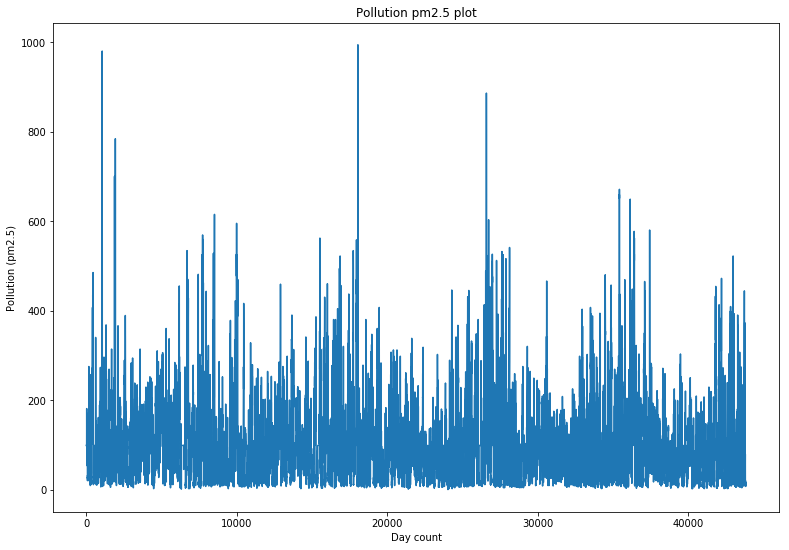

In [44]:

FIGURE_SIZE = (13, 9)

# Pollution plot
plt.figure(figsize=FIGURE_SIZE)
plt.plot(pollution_df.index.values, pollution_df["pm2.5"])
plt.xlabel('Day count')
plt.ylabel('Pollution (pm2.5)')
plt.title('Pollution pm2.5 plot')

plt.show()


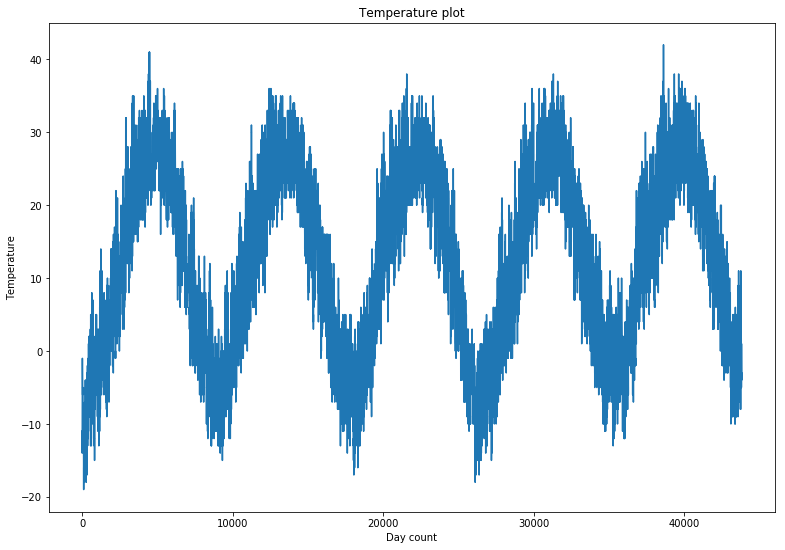

In [43]:

# Temperature plot
plt.figure(figsize=FIGURE_SIZE)
plt.plot(pollution_df.index.values, pollution_df["Temperature"])
plt.xlabel('Day count')
plt.ylabel('Temperature')
plt.title('Temperature plot')

plt.show()


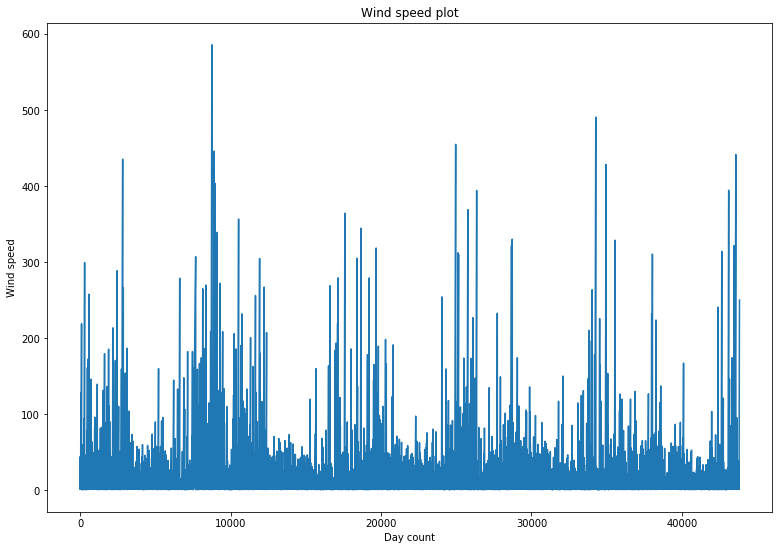

In [47]:

# Wind speed plot
plt.figure(figsize=FIGURE_SIZE)
plt.plot(pollution_df.index.values, pollution_df["Wind_Speed"])
plt.xlabel('Day count')
plt.ylabel('Wind speed')
plt.title('Wind speed plot')

plt.show()


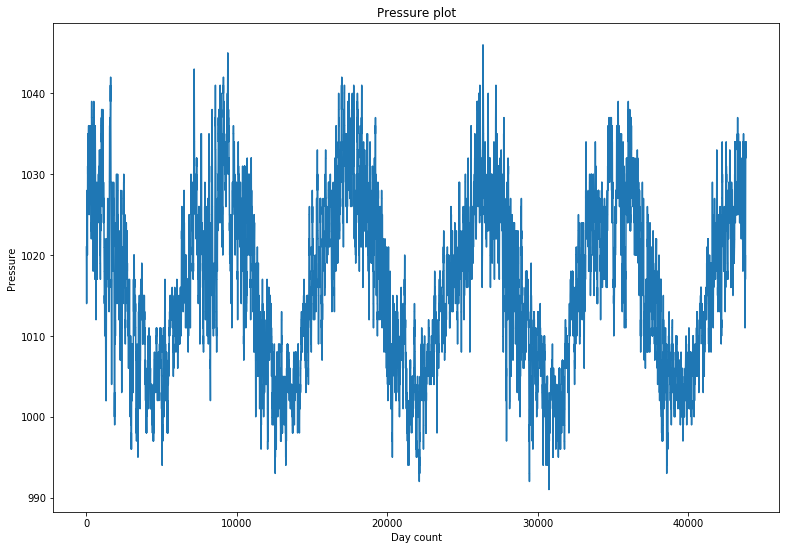

In [49]:

# Pressure plot
plt.figure(figsize=FIGURE_SIZE)
plt.plot(pollution_df.index.values, pollution_df["Pressure"])
plt.xlabel('Day count')
plt.ylabel('Pressure')
plt.title('Pressure plot')

plt.show()


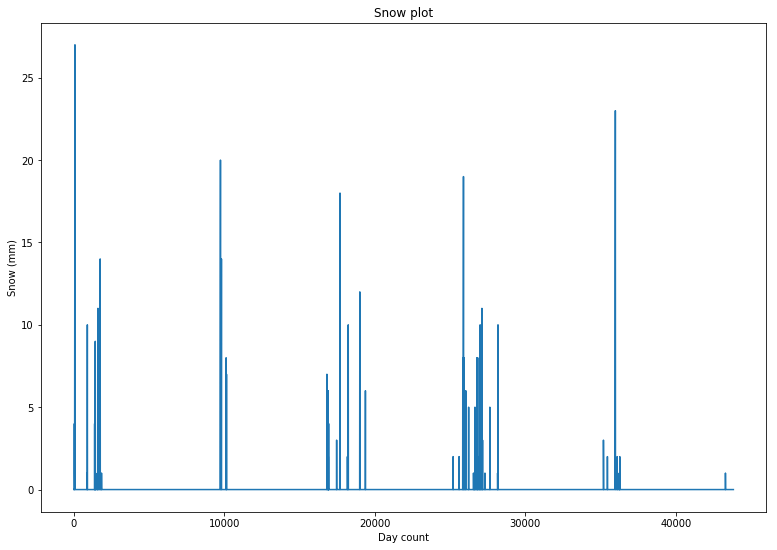

In [59]:

# Snow plot
plt.figure(figsize=FIGURE_SIZE)
plt.plot(pollution_df.index.values, pollution_df["Snow"])
plt.xlabel('Day count')
plt.ylabel('Snow (mm)')
plt.title('Snow plot')

plt.show()


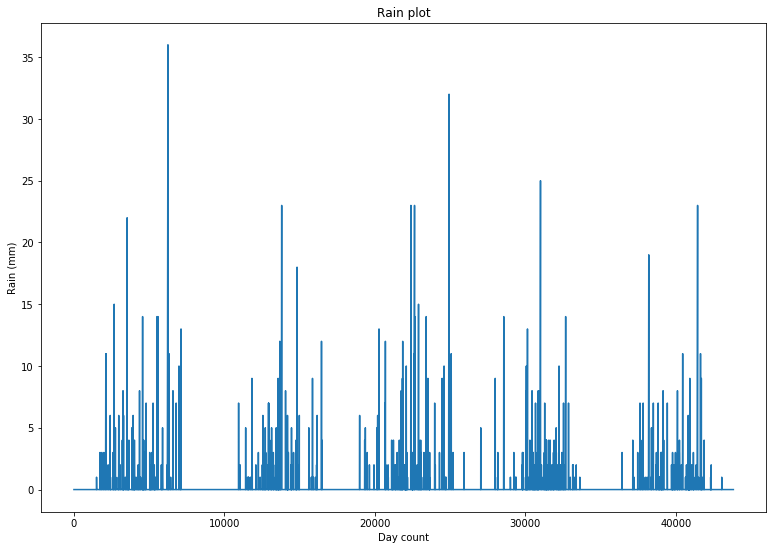

In [60]:

# Rain plot
plt.figure(figsize=FIGURE_SIZE)
plt.plot(pollution_df.index.values, pollution_df["Rain"])
plt.xlabel('Day count')
plt.ylabel('Rain (mm)')
plt.title('Rain plot')

plt.show()


b) Frame the task as the supervised learning problem as predicting the pollution at the current hour given the pollution measurement and weather conditions at the previous hour. Using the first 4 years' data as the training set and the remaining 1 year's data as the test set. Prepare the training/test sets accordingly.

In [12]:
from sklearn import preprocessing

# write your code here

c) Train a Recurrent Neural Network (RNN) on the training set. You can split the training set further by using 10% of the data as the validation set and the remaining for training.

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout

# write your code here

D:\Applications\Python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


d) Output the prediction results such as Root Mean Squared Errors (RMSE) on the test set. Remember that after the forecasts have been made, we need to invert the transforms to return the values back into the original scale. This is needed so that we can calculate error scores and plots that are comparable with other models. Plot the predicted values vs. the actual values.

In [14]:
from sklearn.metrics import mean_squared_error

# write your code here

e) Explore different network architectures (e.g., stacked LSTM layers) and various ways in tuning the model parameters to see if you can improve the model performance on the test set. 

In [15]:
# write your code here

f) Explore alterative prediction setup by predicting the pollution for the next hour based on the weather conditions and pollution over the last 3 days.

In [16]:
# write your code here